In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import geosnap
import segregation
import matplotlib.pyplot as plt

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
geosnap.metros[geosnap.metros.name.str.startswith('Atlanta')]

,geoid,name,type,geometry
754,12060,"Atlanta-Sandy Springs-Roswell, GA",Metro Area,"POLYGON ((-84.298665 32.999671, -84.2986909999..."


In [3]:
atl = geosnap.data.Community(source='ltdb', cbsafips='12060')

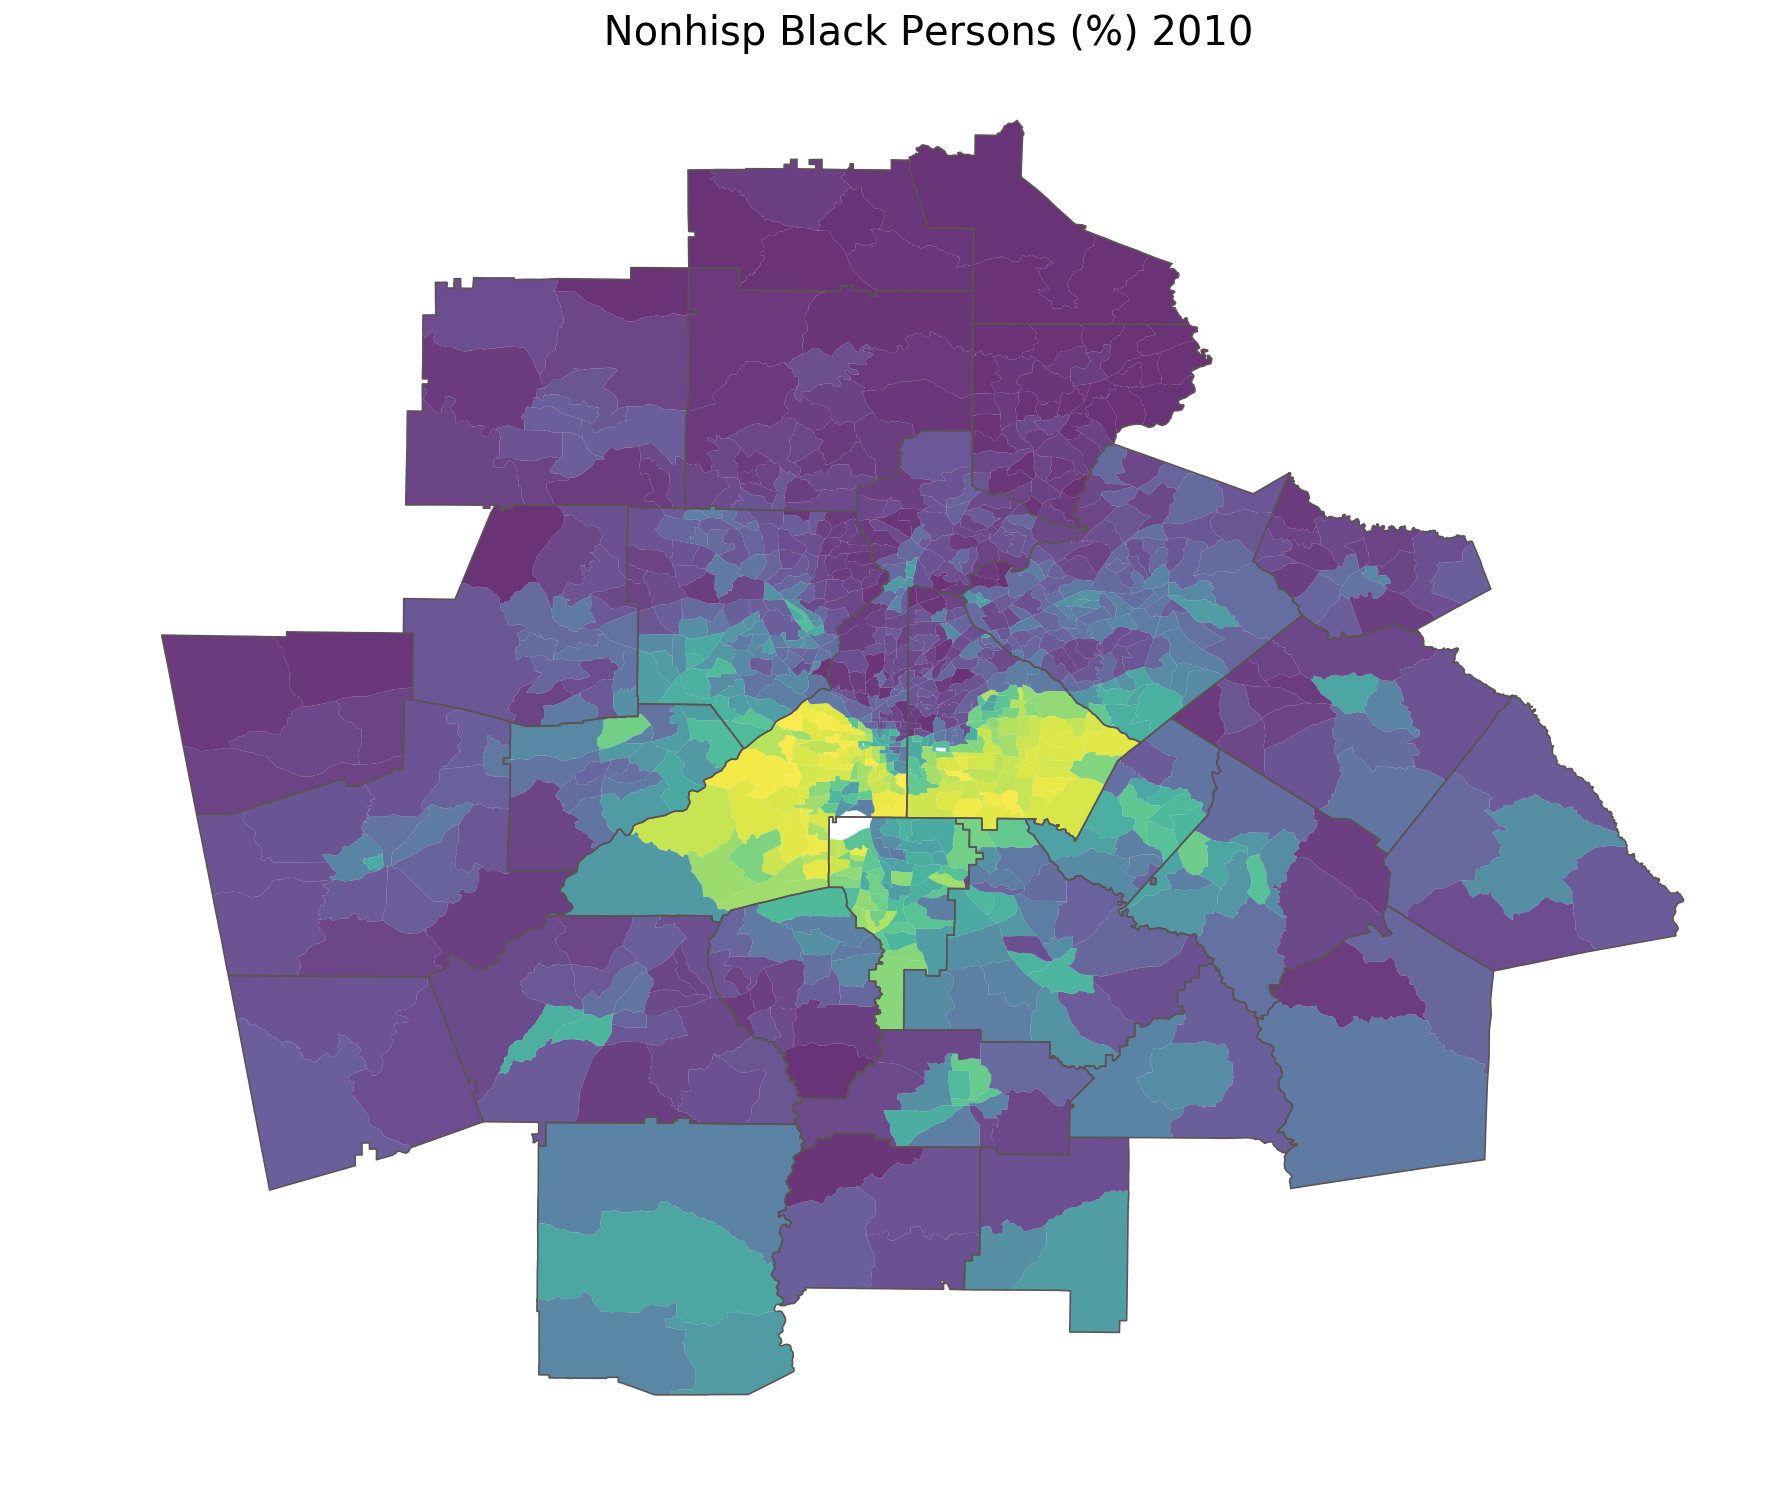

In [4]:
atl.plot('p_nonhisp_black_persons')

In [ ]:
atl_network = segregation.network.get_network(atl.tracts)

downloading the network takes awhile, so uncomment to save it and you can load later

In [7]:
# atl_network.save_hdf5('atl_network.h5')

and use this to read it back in

In [5]:
import pandana as pdna
atl_network = pdna.Network.from_hdf5('atl_network.h5')

In [6]:
gdf = atl.tracts.merge(atl.census[atl.census.year==2010], left_on='geoid', right_index=True, how='left')

In [7]:
pops = ['n_nonhisp_white_persons', 'n_nonhisp_black_persons', 'n_hispanic_persons', 'n_asian_persons']

In [8]:
atl_access = segregation.network.calc_access(gdf, network=atl_network, distance=5000, decay='exp', variables=pops)

In [9]:
atl_access.col()

,accn_nonhisp_white_persons,accn_nonhisp_black_persons,accn_hispanic_persons,accn_asian_persons
count,565087.000000,565087.000000,565087.000000,565087.000000
mean,6069.162596,4908.052733,1912.528184,1011.308531
std,7332.416988,6817.317334,2833.374724,1410.565880
min,0.000000,0.000000,0.000000,0.000000
25%,145.114719,56.261409,37.876266,0.000000
50%,3859.738585,2350.873413,907.232232,322.921571
75%,8694.138624,6507.635232,2498.458656,1546.408625
max,41455.292012,39553.718425,24280.768773,7431.204488


In [14]:
atl_access['pct_black_access'] = atl_access.accn_nonhisp_black_persons/atl_access.sum(axis=1)

(-85.49245024999998, -83.16332674999998, 32.7559758, 34.70658819999999)

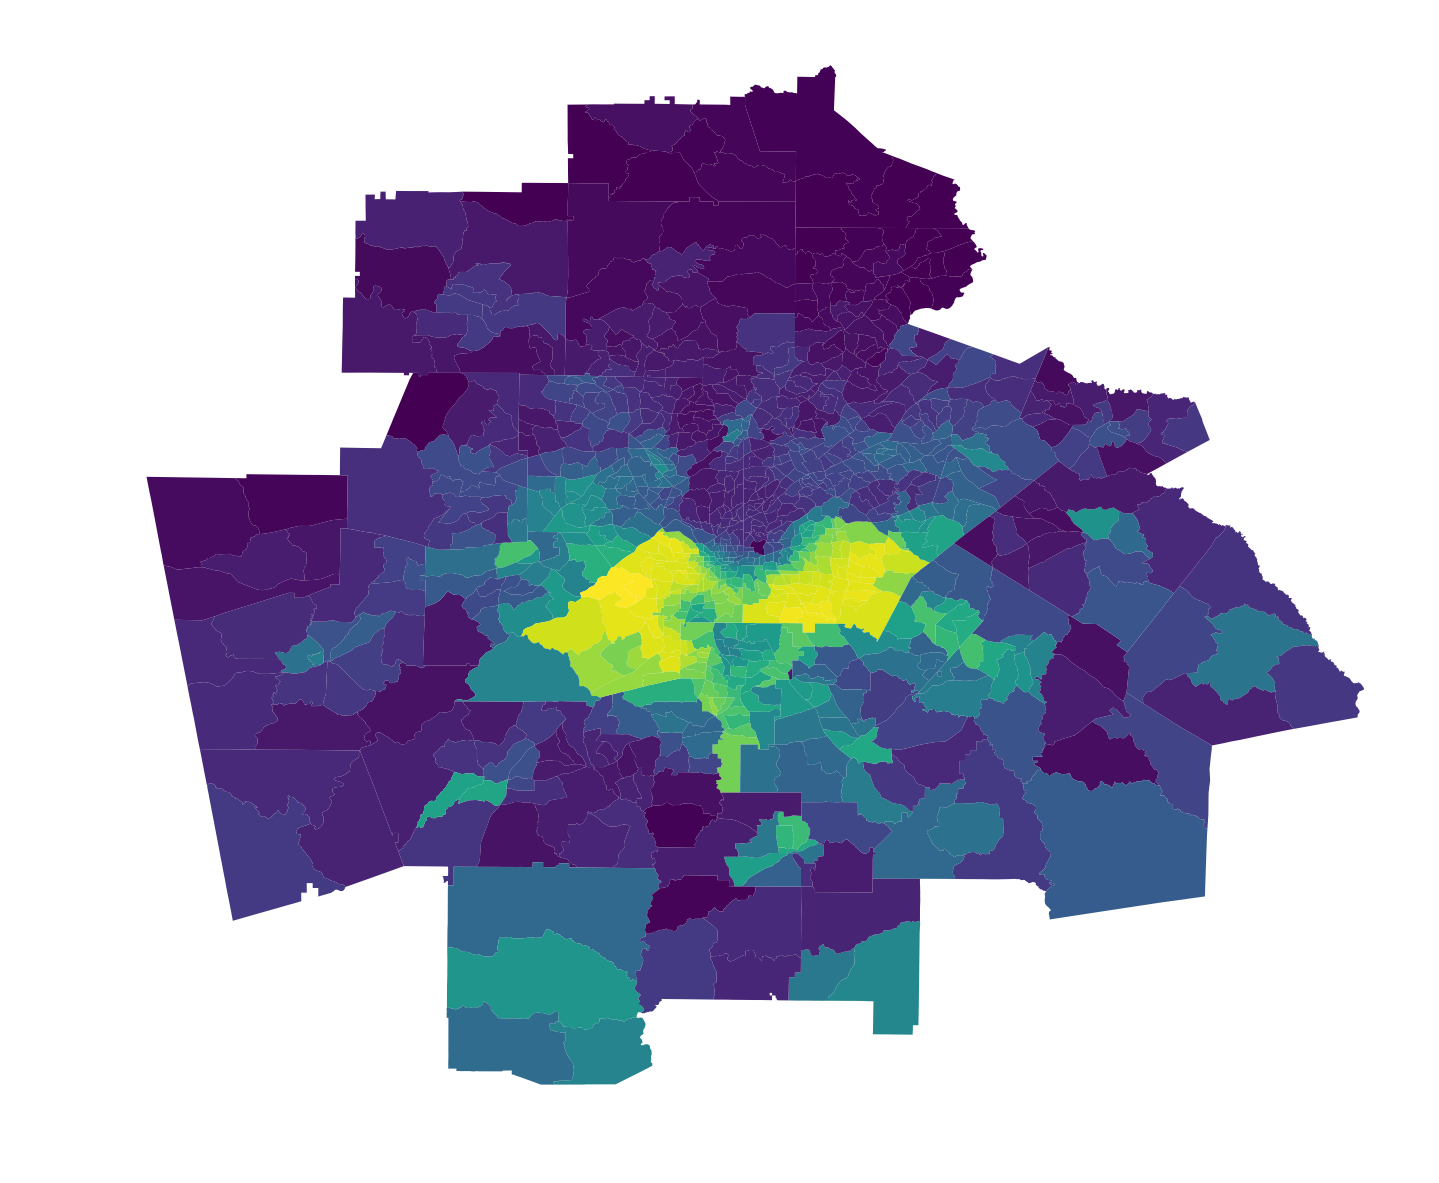

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
gdf.merge(atl_access, left_on='node_ids', right_index=True).dropna(subset=['pct_black_access']).plot('pct_black_access', ax=ax)
ax.axis('off')

In [16]:
import geopandas as gpd

In [17]:
net_points =gpd.GeoDataFrame(atl_access, geometry=gpd.points_from_xy(atl_network.nodes_df['x'],atl_network.nodes_df['y']))

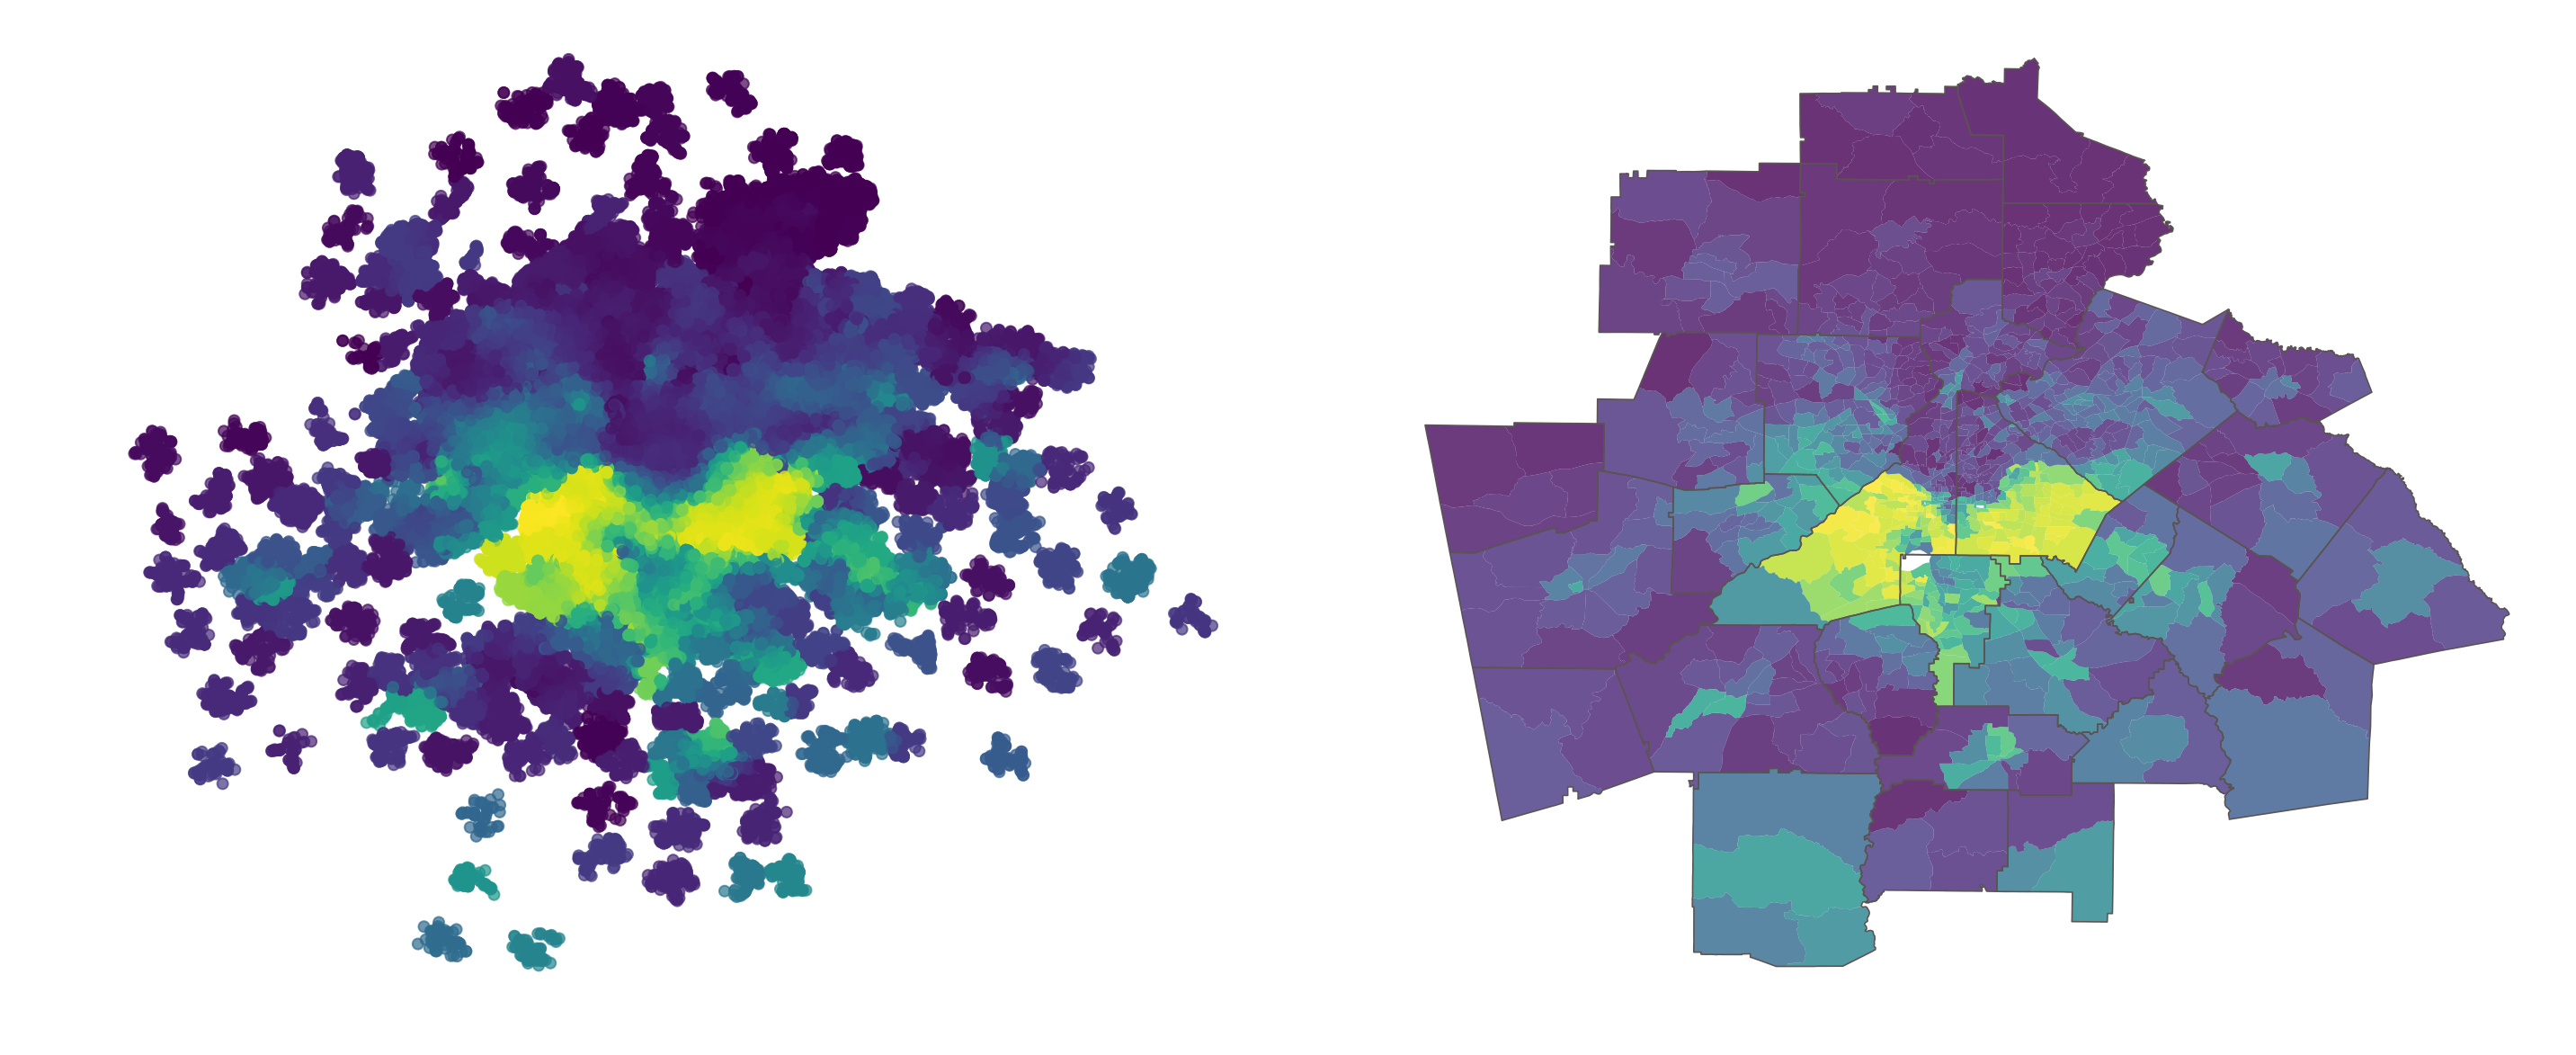

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,20))

net_points.plot('pct_black_access', alpha=0.7, ax=ax[0])
atl.plot('p_nonhisp_black_persons', ax=ax[1])

ax[0].axis('off')
ax[1].axis('off')

plt.tight_layout()

In [19]:
from segregation.network.network import nbsit

In [28]:
H = nbsit(atl_access, atl_access.columns[:5].tolist())

/Users/knaaptime/projects/segregation/segregation/network/network.py:144: RuntimeWarning: divide by zero encountered in log
  log_pipm = np.log(pi_pm) / np.log(m)


In [29]:
H

0.9999783044387504